# Imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define parameters and relative sizes of each sub-population

In [5]:
mu = 10 #magnitude of mean sex score for typical males and females
sigma = 0.25 #standard deviation of sex score for typical males and females
n = 100000 #sample size
pct_true_intersex = .018 #percent of population that is intersex
sigma_mult_true = 5 #how much more variance is there for true intersex vs. male/female and klinefelter/turner/LOCAH
sigma_mult_other = 1 #set variance for chromosomally abnormal/LOCAH populations equal to that of typical males and females
mu_true_intersex = 0 #mean sex score for intersex people
pct_total_intersex = 1.7 #percent of population that are either intersex or chromosomally abnormal/LOCAH
mu_other_intersex = .85*mu #magnitude of mean sex score for chromosomally abnormal/LOCAH individuals

# Simulate data for each sub-population

In [6]:
pop_size=n
males=list(np.random.normal(-1*mu,sigma,round(0.5*(1-pct_total_intersex/100)*pop_size)))
females=list(np.random.normal(mu,sigma,round(0.5*(1-pct_total_intersex/100)*pop_size)))
true_intersex=list(np.random.normal(mu_true_intersex,sigma_mult_true*sigma,round(pop_size*(pct_true_intersex/100))))
other_intersex_male = list(np.random.normal(-1*mu_other_intersex,sigma_mult_other*sigma,round(0.5*pop_size*(pct_total_intersex-pct_true_intersex)/100)))
other_intersex_female = list(np.random.normal(mu_other_intersex,sigma_mult_other*sigma,round(0.5*pop_size*(pct_total_intersex-pct_true_intersex)/100)))

# Combine simulated data from each sub-population

In [7]:
data=males.copy()
data.extend(females)
data.extend(true_intersex)
data.extend(other_intersex_male)
data.extend(other_intersex_female)

# Plot density estimate for simulated sample data

(0.0, 0.21088437205125504)

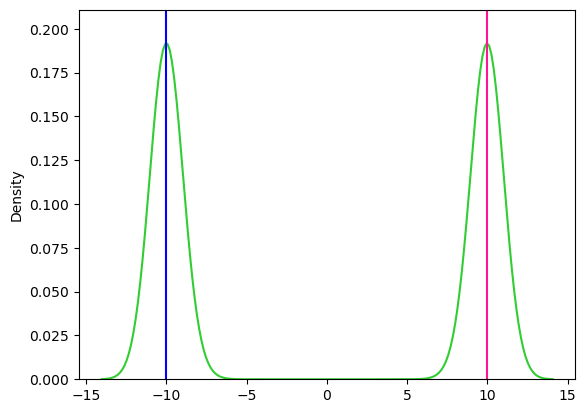

In [8]:
fig, ax=plt.subplots()
plot = sns.kdeplot(data, ax=ax, color='limegreen', bw_adjust=1)

plotdata = ax.lines[0].get_xydata()
ymax=plotdata[np.where(plotdata[:, 1] == max(plotdata[:, 1]))][0][1] #find max y value
plot.vlines(x = [-mu,mu], ymin=0, ymax=1.1*ymax, colors=['blue','deeppink']) #add lines for 'typical' male and female
ax.set_ylim([0, 1.1*ymax]) #set y axis limits

# Add boundaries to categorize intersex vs. male or female

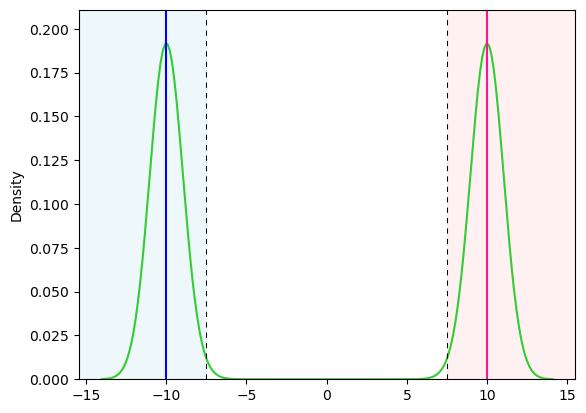

In [9]:
fig, ax=plt.subplots()
plot = sns.kdeplot(data, ax=ax, color='limegreen', bw_adjust=1)

plotdata = ax.lines[0].get_xydata()
ymax=plotdata[np.where(plotdata[:, 1] == max(plotdata[:, 1]))][0][1]
plot.vlines(x = [-mu,mu], ymin=0, ymax=1.1*ymax, colors=['blue','deeppink'])
plot.vlines(x = [-mu_other_intersex+1,mu_other_intersex-1], ymin=0, ymax=1.1*ymax, colors=['black'], linestyle=[(0,(5,5))], linewidth=0.75)
ax.set_ylim([0, 1.1*ymax])

xmin = plotdata[np.where(plotdata[:, 0] == min(plotdata[:, 0]))][0][0]
xmax = plotdata[np.where(plotdata[:, 0] == max(plotdata[:, 0]))][0][0]
ax.set_xlim([1.1*xmin, 1.1*xmax])

threshold = -mu_other_intersex+1
x = np.arange(-20, 20, 0.01)
ax.fill_between(x, 0, 1, where=x < threshold,
                color='lightblue', alpha=0.2, transform=ax.get_xaxis_transform())
threshold = mu_other_intersex-1
ax.fill_between(x, 0, 1, where=x > threshold,
                color='lightpink', alpha=0.2, transform=ax.get_xaxis_transform())

# Plot density estimate with less data smoothing

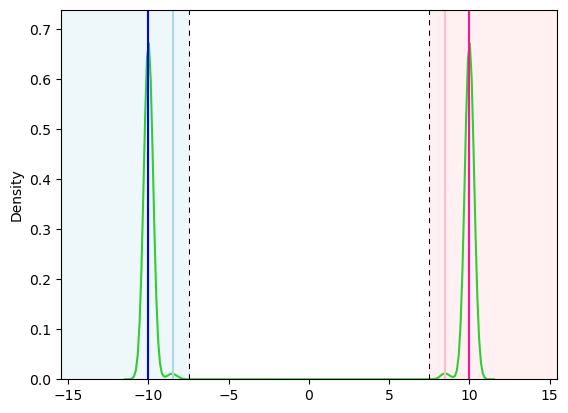

In [10]:
fig, ax=plt.subplots()
plot = sns.kdeplot(data, ax=ax, color='limegreen', bw_adjust=0.15)

plotdata = ax.lines[0].get_xydata()
ymax=plotdata[np.where(plotdata[:, 1] == max(plotdata[:, 1]))][0][1]
plot.vlines(x = [-mu,mu,-mu_other_intersex,mu_other_intersex], ymin=0, ymax=1.1*ymax, colors=['blue','deeppink','lightblue','pink'])
plot.vlines(x = [-mu_other_intersex+1,mu_other_intersex-1], ymin=0, ymax=1.1*ymax, colors=['black'], linestyle=[(0,(5,5))], linewidth=0.75)
ax.set_ylim([0, 1.1*ymax])

ax.set_xlim([1.1*xmin, 1.1*xmax])

threshold = -mu_other_intersex+1
x = np.arange(-20, 20, 0.01)
ax.fill_between(x, 0, 1, where=x < threshold,
                color='lightblue', alpha=0.2, transform=ax.get_xaxis_transform())
threshold = mu_other_intersex-1
ax.fill_between(x, 0, 1, where=x > threshold,
                color='lightpink', alpha=0.2, transform=ax.get_xaxis_transform())

# Add boundaries matching the Anne Fausto Sterling definition of intersex

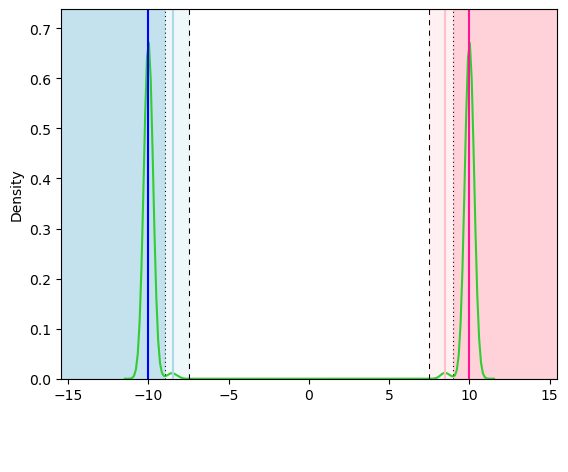

In [11]:
fig, ax=plt.subplots()
plot = sns.kdeplot(data, ax=ax, color='limegreen', bw_adjust=.15)

plotdata = ax.lines[0].get_xydata()
ymax=plotdata[np.where(plotdata[:, 1] == max(plotdata[:, 1]))][0][1]
plot.vlines(x = [-mu,mu,-mu_other_intersex,mu_other_intersex], ymin=0, ymax=1.1*ymax, colors=['blue','deeppink','lightblue','pink'])
plot.vlines(x = [-mu+1,-mu_other_intersex+1,mu-1,mu_other_intersex-1], ymin=0, ymax=1.1*ymax, colors=['black'], linestyle=[(0,(1,3)),(0,(5,5))], linewidth=0.75)
ax.set_ylim([0, 1.1*ymax])

#xmin = plotdata[np.where(plotdata[:, 0] == min(plotdata[:, 0]))][0][0]
#xmax = plotdata[np.where(plotdata[:, 0] == max(plotdata[:, 0]))][0][0]
ax.set_xlim([1.1*xmin, 1.1*xmax])

#ax.axes.get_xaxis().set_ticks([])
ax.set_xlabel('x-axis', fontsize = 40,color='white') 

threshold = -mu_other_intersex+1
x = np.arange(-20, 20, 0.01)
ax.fill_between(x, 0, 1, where=x < threshold,
                color='lightblue', alpha=0.2, transform=ax.get_xaxis_transform())
threshold = mu_other_intersex-1
ax.fill_between(x, 0, 1, where=x > threshold,
                color='lightpink', alpha=0.2, transform=ax.get_xaxis_transform())


threshold = -mu+1
x = np.arange(-20, 20, 0.01)
ax.fill_between(x, 0, 1, where=x < threshold,
                color='lightblue', alpha=0.65, transform=ax.get_xaxis_transform())
threshold = mu-1
ax.fill_between(x, 0, 1, where=x > threshold,
                color='lightpink', alpha=0.5, transform=ax.get_xaxis_transform())

# Check percent of sample counted as intersex with first boundary choice

In [12]:
bar=mu_other_intersex-1
pct_true_ints=(len([x for x in data if x>bar])+len([x for x in data if x<-bar]))/n
(1-pct_true_ints)*100

0.017999999999995797

# Check percent of sample counted as intersex with strict boundary

In [13]:
bar=mu-1
pct_all_ints=(len([x for x in data if x>bar])+len([x for x in data if x<-bar]))/n
(1-pct_all_ints)*100

1.6630000000000034